# Machine Learning Engineering Project: Wind Turbine Fault Detection

- Name: Jean Pasato
- RIN: 661955756

# Import Packages

The following are the packages used to create the PCA algorithm and SVM models using Scikit.

In [21]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import OneClassSVM

# Import Data

Data would be imported from a .csv file. The features of interest were as follows:

1. Unit Location
2. Time Stamp
3. Wind Speed
4. Power Produced (kWh)
5. Wind Direction (degree)
6. Rotational Speed (RPM)
7. Pitch Angle
8. Generation
9. Wheel Hub Temperature
10. Ambient Temperature
11. Tower Bottom Ambient Temperature
12. Failure Time

In [12]:
df = pd.read_csv('wt.csv')

df.columns = df.columns.str.replace(' ','_')

# Split wind turbine data into two datasets based on location (WTG40 and WTF43)
group = df.groupby(df.Unit_Location)
wtg40 = group.get_group("WTG40")

# Separate 'Fault Time' for WTG40 from main dataset
wtg40_fault_time = wtg40.Failure_Time.unique()

num_it = len(wtg40) + 1
total_runtime = []
for i in range(1, num_it):
    total_runtime.append(i*10)
wtg40['Total_Runtime'] = total_runtime
wtg40['Fault'] = wtg40['Total_Runtime'] < wtg40_fault_time.max()

# Remove unimport columns
df = wtg40.drop(['Timestamp', 'Unit_Location', 'Total_Runtime', 'Failure_Time'], axis=1)

# Setting up fault column
df['Fault'] = df['Fault'].astype('category')
df['Fault'] = df['Fault'].cat.codes

# Prepare final datasets for training

y = df['Fault']
x = df.drop(['Fault'], axis=1)
display(df)
display(x)
display(y)

C:\Users\PASATJ\AppData\Local\Temp\ipykernel_85104\4169014334.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wtg40['Total_Runtime'] = total_runtime
C:\Users\PASATJ\AppData\Local\Temp\ipykernel_85104\4169014334.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wtg40['Fault'] = wtg40['Total_Runtime'] < wtg40_fault_time.max()


,Wind_Speed,Power,Wind_Direction,Rotor_Speed,Pitch_Angle,Generation,Wheel_Hub_Temperature,Ambient_Temperature,Tower_Bottom_Ambient_Temperature,Fault
0,0.93,0.00,0.00,0.38,49.99,2872434,10.54,2.78,19.40,1
1,0.81,0.00,0.00,0.37,49.99,2872434,10.60,2.80,19.08,1
2,0.56,0.00,0.00,0.36,49.99,2872434,10.92,2.76,19.34,1
3,0.46,0.00,0.00,0.36,49.99,2872434,10.65,2.72,19.32,1
4,0.45,0.00,0.00,0.33,49.99,2872434,10.62,2.82,19.19,1
...,...,...,...,...,...,...,...,...,...,...
42587,12.01,2209.35,176.07,12.37,10.18,7528196,2.68,-3.94,11.16,0
42588,11.71,2209.16,176.39,12.37,9.57,7528562,2.58,-4.26,10.91,0
42589,11.38,2212.44,176.05,12.37,9.00,7528934,2.50,-4.53,10.78,0
42590,11.25,2215.08,176.49,12.38,8.94,7529302,2.50,-4.49,10.90,0


,Wind_Speed,Power,Wind_Direction,Rotor_Speed,Pitch_Angle,Generation,Wheel_Hub_Temperature,Ambient_Temperature,Tower_Bottom_Ambient_Temperature
0,0.93,0.00,0.00,0.38,49.99,2872434,10.54,2.78,19.40
1,0.81,0.00,0.00,0.37,49.99,2872434,10.60,2.80,19.08
2,0.56,0.00,0.00,0.36,49.99,2872434,10.92,2.76,19.34
3,0.46,0.00,0.00,0.36,49.99,2872434,10.65,2.72,19.32
4,0.45,0.00,0.00,0.33,49.99,2872434,10.62,2.82,19.19
...,...,...,...,...,...,...,...,...,...
42587,12.01,2209.35,176.07,12.37,10.18,7528196,2.68,-3.94,11.16
42588,11.71,2209.16,176.39,12.37,9.57,7528562,2.58,-4.26,10.91
42589,11.38,2212.44,176.05,12.37,9.00,7528934,2.50,-4.53,10.78
42590,11.25,2215.08,176.49,12.38,8.94,7529302,2.50,-4.49,10.90


0        1
1        1
2        1
3        1
4        1
        ..
42587    0
42588    0
42589    0
42590    0
42591    0
Name: Fault, Length: 42592, dtype: int8

In [23]:
print(x.isnull().values.any())

False


# Dimensionality Reduction and PCA

In an effort to reduce dimensionality, a PCA was performed in an effort to fin the best low-dim representation preserving as much information as possible. The StandardScaler function will be used to remove the mean and scale standardized features to the unit variance. Then, the PCA will be performed to select the number of components.


,Wind_Speed,Power,Wind_Direction,Rotor_Speed,Pitch_Angle,Generation,Wheel_Hub_Temperature,Ambient_Temperature,Tower_Bottom_Ambient_Temperature
0,-1.358224,-0.884118,-3.505606,-1.782974,1.942377,-2.264226,-1.514270,-1.397226,-1.485369
1,-1.401533,-0.884118,-3.505606,-1.785578,1.942377,-2.264226,-1.506850,-1.395087,-1.534427
2,-1.491762,-0.884118,-3.505606,-1.788182,1.942377,-2.264226,-1.467279,-1.399366,-1.494567
3,-1.527854,-0.884118,-3.505606,-1.788182,1.942377,-2.264226,-1.500667,-1.403645,-1.497633
4,-1.531463,-0.884118,-3.505606,-1.795994,1.942377,-2.264226,-1.504377,-1.392947,-1.517563
...,...,...,...,...,...,...,...,...,...
42587,2.640720,2.103545,0.102219,1.339199,0.061933,1.509535,-2.486225,-2.116152,-2.748601
42588,2.532446,2.103288,0.108776,1.339199,0.033119,1.509831,-2.498591,-2.150387,-2.786928
42589,2.413343,2.107724,0.101810,1.339199,0.006195,1.510133,-2.508484,-2.179272,-2.806857
42590,2.366424,2.111294,0.110826,1.341803,0.003361,1.510431,-2.508484,-2.174993,-2.788461


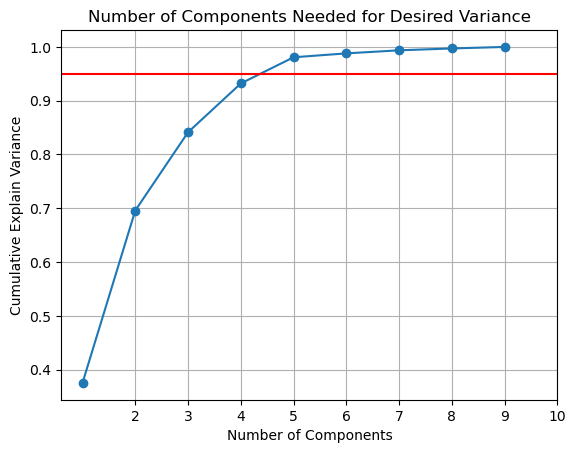

The fifth component of the data captures close to 99% of the information of the dataset.


In [13]:
# List feature names
features = ['Wind_Speed', 'Power', 'Wind_Direction', 'Rotor_Speed', 'Pitch_Angle'
               ,'Generation', 'Wheel_Hub_Temperature', 'Ambient_Temperature', 'Tower_Bottom_Ambient_Temperature']

# Create new standardized dataset
x_std = StandardScaler().fit_transform(x)
x_std = pd.DataFrame(x_std, columns=features)
display(x_std)

# Selecting the number of components with PCA with the standardized dataset
pca = PCA().fit(x_std)
desired_variance = 0.95
explained_variance_ratios = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratios)
components = np.arange(1, cumulative_explained_variance.shape[0]+1, step=1)
plt.figure()
plt.plot(components, cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explain Variance')
plt.xticks(components + 1)
plt.title('Number of Components Needed for Desired Variance')
plt.axhline(y=desired_variance, color='r', linestyle='-')
plt.grid()
plt.show()

print('The fifth component of the data captures close to 99% of the information of the dataset.')


# Feature Importance and Selection

From the PCA analysis results, it is determined that five components shall be used for the dataset for feature selection.
A biplot was used to visualize the magnitude of the coefficients for feature selection. Code was referenced to be able to develop the plot, which is cited below.

In [14]:

pca_new = PCA(n_components=2)
X = pca_new.fit_transform(x_std)
display(X)

array([[-0.35104603,  2.97913512],
       [-0.36204073,  3.01016619],
       [-0.42436286,  2.99481883],
       ...,
       [ 4.44375194,  2.82710526],
       [ 4.4187954 ,  2.82486931],
       [ 4.39452195,  2.86047325]])

In [15]:
# Variance Ratio of Each Components
vr = pca_new.explained_variance_ratio_
print(vr)

[0.37528614 0.32053537]


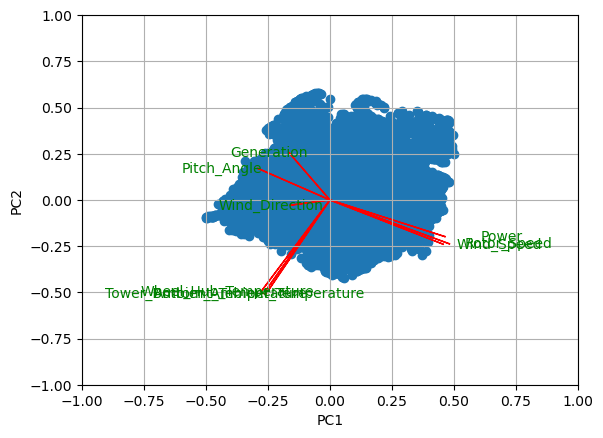

In [24]:
# CITATION: https://stackoverflow.com/questions/50796024/feature-variable-importance-after-a-pca-analysis

# 'myplot' function written to visualize the first two principal components
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs*scalex, ys*scaley)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r')
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'r', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.5, coeff[i,1], labels[i], color = 'g', ha = 'center', va = 'center')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()
myplot(X[:,0:2],np.transpose(pca_new.components_[0:2, :]),features)
plt.show()




In [17]:
# CITATION: https://stackoverflow.com/questions/50796024/feature-variable-importance-after-a-pca-analysis

# Number of Components
n_pcs= pca_new.components_.shape[0]
print("The number of components: {}".format(n_pcs))

most_important = [np.abs(pca_new.components_[i]).argmax() for i in range(n_pcs)]

# Obtain Important Feature Names
most_important_names = [features[most_important[i]] for i in range(n_pcs)]
print("The most important features are: {}".format(most_important_names))

The number of components: 2
The most important features are: ['Rotor_Speed', 'Tower_Bottom_Ambient_Temperature']


In [18]:
X_train =X[:35000]
X_test = X[35000:42592]
y_train = y[:35000]
y_test = y[35000:42592]

C:\Users\PASATJ\AppData\Local\Temp\ipykernel_85104\3704351817.py:31: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend([legend1_values_list[0].collections[0]],


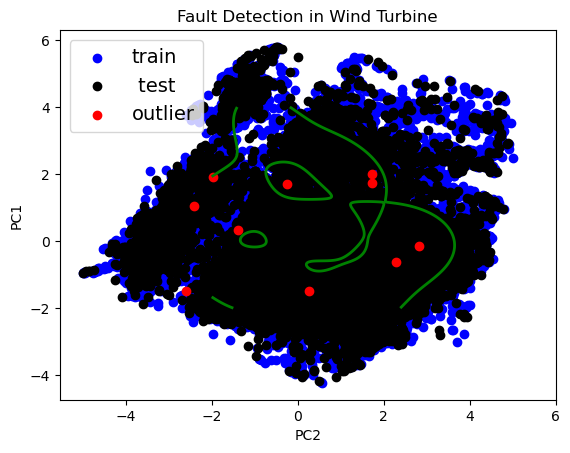

In [39]:
clf = OneClassSVM(nu=0.25, gamma=0.35)
clf.fit(X_train)

# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-3, high=3, size=(10, 2))

y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

# error 
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

xx, yy = np.meshgrid(np.linspace(-2, 6, 500), np.linspace(-2, 4, 500))
plt.figure(1)
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
legend1 = {}
legend1["boundry"] = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='green')
legend1_values_list = list(legend1.values())
legend1_keys_list = list(legend1.keys())
plt.figure(1)  
plt.title("Fault Detection in Wind Turbine")
plt.scatter(X_train[:, 0], X_train[:, 1], color='blue')
plt.scatter(X_test[:, 0], X_test[:, 1], color='black')
plt.scatter(X_outliers[:, 0], X_outliers[:, 1], color='red')
#plt.xlim((xx.min(), xx.max()))
#plt.ylim((yy.min(), yy.max()))
plt.legend([legend1_values_list[0].collections[0]],     
           labels= ["train"," test",'outlier'],
           loc="best",
           prop=matplotlib.font_manager.FontProperties(size=14))
plt.ylabel("PC1")
plt.xlabel("PC2")
plt.show()


In [34]:
clf.get_params(deep=True)

{'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'gamma': 0.35,
 'kernel': 'rbf',
 'max_iter': -1,
 'nu': 0.25,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [38]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

model = Sequential()

model.add(Dense(10, activation='relu', input_dim = X_train.shape[1]))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(7, activation='softmax'))

model.compile(optimizer='adam', 
            loss='categorical_crossentropy', 
            metrics=['accuracy'])

history=model.fit(X_train, y_train, epochs=300, verbose=1,validation_data=(X_test, y_test))



Epoch 1/300


ValueError: in user code:

    File "C:\Users\PASATJ\Anaconda3\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\PASATJ\Anaconda3\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\PASATJ\Anaconda3\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\PASATJ\Anaconda3\lib\site-packages\keras\engine\training.py", line 1024, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "C:\Users\PASATJ\Anaconda3\lib\site-packages\keras\engine\training.py", line 1082, in compute_loss
        return self.compiled_loss(
    File "C:\Users\PASATJ\Anaconda3\lib\site-packages\keras\engine\compile_utils.py", line 265, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\PASATJ\Anaconda3\lib\site-packages\keras\losses.py", line 152, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\PASATJ\Anaconda3\lib\site-packages\keras\losses.py", line 284, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\PASATJ\Anaconda3\lib\site-packages\keras\losses.py", line 2004, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\PASATJ\Anaconda3\lib\site-packages\keras\backend.py", line 5532, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 7) are incompatible
